In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal , Annotated, List
import operator
from dotenv import load_dotenv
import os
from pydantic import BaseModel, Field
from euriai.langchain import create_chat_model
from langgraph.checkpoint.memory import InMemorySaver
load_dotenv()
api_key = os.getenv("key")

In [4]:
chat_model = create_chat_model(
    api_key=api_key,
    model="gpt-4.1-nano",
    temperature=0.7
)

In [5]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [25]:
def generate_joke(state: JokeState):
    topic = state['topic']
    joke_prompt = f"Tell me a joke about {topic}."
    joke_response = chat_model.invoke(joke_prompt).content
    
    return {"joke": joke_response}

def explain_joke(state: JokeState):
    joke = state['joke']
    explanation_prompt = f"Explain the following joke: {joke}"
    explanation_response = chat_model.invoke(explanation_prompt).content
    
    return {"explanation": explanation_response}

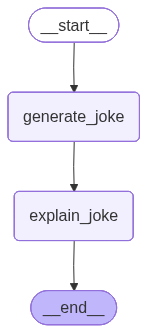

In [26]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("explain_joke", explain_joke)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [27]:
## This will start a new thread with thread_id "1" and run the workflow with the given input

config1 = {"configurable": {"thread_id": "1"}}

workflow.invoke({"topic": "programming"}, config=config1)

{'topic': 'programming',
 'joke': "Sure! Here's a programming joke for you:\n\nWhy do programmers prefer dark mode?\n\nBecause light attracts bugs!",
 'explanation': 'Certainly! This joke is a pun that plays on two different meanings of the word "light." \n\n1. In the context of programming, "bugs" are errors or flaws in the code. Developers often try to fix bugs to improve their programs.\n\n2. The joke references "light" as in the bright displays or backgrounds used in programming environments, known as "light mode," versus "dark mode," which has a dark background.\n\nThe punchline, "Because light attracts bugs," humorously suggests that using light mode (or bright screens) draws in "bugs" like actual insects are attracted to light, playing on the idea that bugs in software are attracted to light, which is a humorous and metaphorical way of saying that light mode might somehow cause more bugs or attract them.\n\nOverall, it\'s a fun play on words that combines programming terminology

In [28]:
### This will give you the latest state of the workflow for the given thread_id
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'programming', 'joke': "Sure! Here's a programming joke for you:\n\nWhy do programmers prefer dark mode?\n\nBecause light attracts bugs!", 'explanation': 'Certainly! This joke is a pun that plays on two different meanings of the word "light." \n\n1. In the context of programming, "bugs" are errors or flaws in the code. Developers often try to fix bugs to improve their programs.\n\n2. The joke references "light" as in the bright displays or backgrounds used in programming environments, known as "light mode," versus "dark mode," which has a dark background.\n\nThe punchline, "Because light attracts bugs," humorously suggests that using light mode (or bright screens) draws in "bugs" like actual insects are attracted to light, playing on the idea that bugs in software are attracted to light, which is a humorous and metaphorical way of saying that light mode might somehow cause more bugs or attract them.\n\nOverall, it\'s a fun play on words that combines prog

In [29]:
## This will give you the entire history of states for the given thread_id
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'programming', 'joke': "Sure! Here's a programming joke for you:\n\nWhy do programmers prefer dark mode?\n\nBecause light attracts bugs!", 'explanation': 'Certainly! This joke is a pun that plays on two different meanings of the word "light." \n\n1. In the context of programming, "bugs" are errors or flaws in the code. Developers often try to fix bugs to improve their programs.\n\n2. The joke references "light" as in the bright displays or backgrounds used in programming environments, known as "light mode," versus "dark mode," which has a dark background.\n\nThe punchline, "Because light attracts bugs," humorously suggests that using light mode (or bright screens) draws in "bugs" like actual insects are attracted to light, playing on the idea that bugs in software are attracted to light, which is a humorous and metaphorical way of saying that light mode might somehow cause more bugs or attract them.\n\nOverall, it\'s a fun play on words that combines pro

In [33]:
config2 = {"configurable": {"thread_id": "2"}}

print(workflow.invoke({"topic": "pizza"}, config=config2))

print("=================================================================")
print("State for thread_id 2:")

print(workflow.get_state(config=config2))

print("=================================================================")
print("History for thread_id 2:")

x = list(workflow.get_state_history(config=config2))
print(x)

{'topic': 'pizza', 'joke': "Sure! Here's a pizza joke for you:\n\nWhy did the pizza go to the party? Because it knew how to slice up the fun!", 'explanation': 'Sure! This joke plays on a pun involving pizza and the phrase "slice up the fun." \n\nIn the joke, the pizza "goes to the party," which is funny because animals or people don\'t usually attend parties, but pizzas are often associated with fun social gatherings. The punchline "because it knew how to slice up the fun" is a pun: \n\n- "Slice" refers to how pizza is cut into slices. \n- "Slice up the fun" sounds like "spice up the fun," meaning to make things more exciting.\n\nSo, the joke humorously suggests that the pizza is capable of making the party more enjoyable because it "knows how to slice up the fun" — a clever wordplay combining pizza slices and adding excitement to the event.'}
State for thread_id 2:
StateSnapshot(values={'topic': 'pizza', 'joke': "Sure! Here's a pizza joke for you:\n\nWhy did the pizza go to the party?

In [34]:
x = list(workflow.get_state_history(config=config2))

In [35]:
x

[StateSnapshot(values={'topic': 'pizza', 'joke': "Sure! Here's a pizza joke for you:\n\nWhy did the pizza go to the party? Because it knew how to slice up the fun!", 'explanation': 'Sure! This joke plays on a pun involving pizza and the phrase "slice up the fun." \n\nIn the joke, the pizza "goes to the party," which is funny because animals or people don\'t usually attend parties, but pizzas are often associated with fun social gatherings. The punchline "because it knew how to slice up the fun" is a pun: \n\n- "Slice" refers to how pizza is cut into slices. \n- "Slice up the fun" sounds like "spice up the fun," meaning to make things more exciting.\n\nSo, the joke humorously suggests that the pizza is capable of making the party more enjoyable because it "knows how to slice up the fun" — a clever wordplay combining pizza slices and adding excitement to the event.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f10fd46-2e0e-6b26-8006-2330a1